In [56]:
# Kerakli kutubxonalarni yuklab olish
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [ ]:
# Datasetni yuklab olish
csv_path = "datasets/usd_rates.csv"
df = pd.read_csv(csv_path)
df.head()

,id,Code,Ccy,CcyNm_RU,CcyNm_UZ,CcyNm_UZC,CcyNm_EN,Nominal,Rate,Diff,Date
0,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"8,299.20",21.67,27.11.2018
1,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"8,299.20",21.67,27.11.2018
2,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"8,299.20",21.67,27.11.2018
3,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"8,314.85",15.65,04.12.2018
4,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"8,314.85",15.65,04.12.2018


In [55]:
# Kerakli ustunlarni alohida DataFrame ga nusxalash
selected_cols = ["Ccy", "Rate", "Diff", "Date"]
df = df[selected_cols].copy()
df = df.sort_values("Date")
df.tail(10)

,Ccy,Rate,Diff,Date
5167,USD,"11,988.32",16.92,2025-11-25
5168,USD,"11,936.89",-51.43,2025-11-26
5170,USD,"11,881.60",-55.29,2025-11-27
5172,USD,"11,902.30",20.70,2025-11-28
5178,USD,"11,940.95",38.65,2025-12-01
5180,USD,"11,895.57",-45.38,2025-12-02
5182,USD,"11,880.93",-14.64,2025-12-03
5184,USD,"11,912.38",31.45,2025-12-04
5190,USD,"11,963.23",50.85,2025-12-05
5194,USD,"11,990.09",26.86,2025-12-09


### Exploratory Data Analysis (EDA)

In [30]:
# Kerakli sozlamalarni amalga oshirish
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 10
pd.set_option("display.float_format", lambda v: f"{v:,.2f}")

In [34]:
df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y", errors="coerce")
df = df.sort_values("Date").reset_index(drop=True)

print(f"Rows: {len(df):,}; Columns: {df.shape[1]}")
df.sample(5)

Rows: 5,196; Columns: 4


,Ccy,Rate,Diff,Date
2029,USD,"10,639.79",21.61,2021-08-09
3054,USD,"11,246.81",21.35,2023-01-04
1052,USD,"9,590.10",35.88,2020-04-07
1555,USD,"10,463.12",20.05,2020-12-15
1188,USD,"10,153.19",4.88,2020-06-09


In [35]:
num_cols = df.select_dtypes(include=["number"]).columns
summary = df[num_cols].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).T
summary["iqr"] = (summary["75%"] - summary["25%"]).round(2)
summary

,count,mean,std,min,5%,25%,50%,75%,95%,max,iqr
Rate,"5,196.00","11,000.15","1,370.47","8,299.20","8,392.96","10,210.39","10,950.06","12,311.98","12,909.30","13,003.95","2,101.59"
Diff,"5,196.00",6.90,39.47,-109.05,-28.97,-10.63,7.00,16.99,38.68,427.64,27.62


In [36]:
yearly = (
    df.assign(Year=df["Date"].dt.year)
    .groupby("Year")["Rate"]
    .agg(["count", "mean", "std", "min", "max"])
)
yearly


,count,mean,std,min,max
Year,,,,,
2018,93,"8,320.84",12.43,"8,299.20","8,339.55"
2019,775,"8,828.85",485.89,"8,336.25","9,537.55"
2020,728,"10,069.45",340.56,"9,500.54","10,476.92"
2021,730,"10,613.93",102.29,"10,449.44","10,848.58"
2022,728,"11,055.00",183.72,"10,800.55","11,571.99"
2023,728,"11,744.68",399.67,"11,246.81","12,389.97"
2024,732,"12,655.87",134.92,"12,341.54","12,928.27"
2025,682,"12,609.37",361.62,"11,880.93","13,003.95"


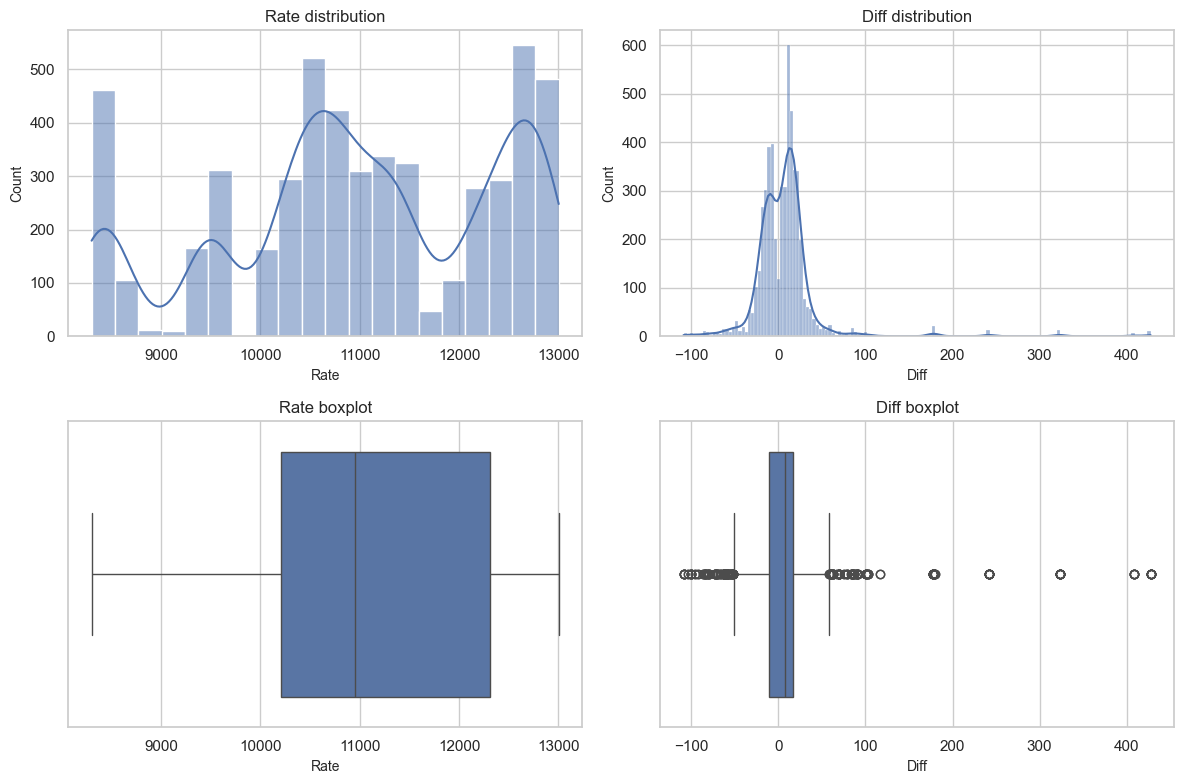

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df["Rate"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Rate distribution")
sns.histplot(df["Diff"].dropna(), kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Diff distribution")
sns.boxplot(x=df["Rate"], ax=axes[1, 0])
axes[1, 0].set_title("Rate boxplot")
sns.boxplot(x=df["Diff"].dropna(), ax=axes[1, 1])
axes[1, 1].set_title("Diff boxplot")
plt.tight_layout()


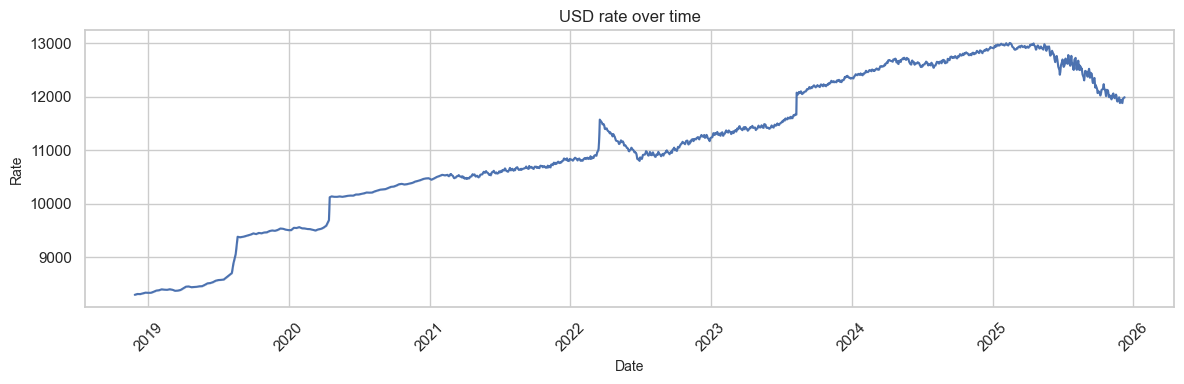

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(data=df, x="Date", y="Rate", ax=ax, linewidth=1.5)
ax.set_title("USD rate over time")
ax.set_xlabel("Date")
ax.set_ylabel("Rate")
plt.xticks(rotation=45)
plt.tight_layout()

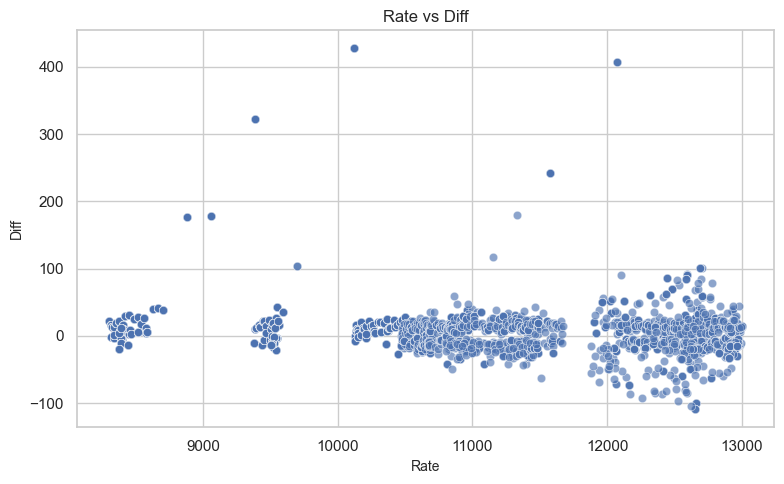

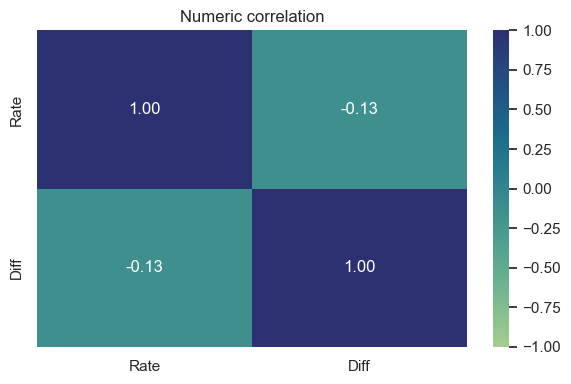

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df, x="Rate", y="Diff", alpha=0.4, ax=ax)
ax.set_title("Rate vs Diff")
plt.tight_layout()

corr = df.select_dtypes(include=["number"]).corr()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="crest", vmin=-1, vmax=1, ax=ax)
ax.set_title("Numeric correlation")
plt.tight_layout()


### Data Cleaning

In [40]:
# Jadval haqida qisqa ma'lumot
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5196 entries, 0 to 5195
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Ccy     5196 non-null   object        
 1   Rate    5196 non-null   float64       
 2   Diff    5196 non-null   float64       
 3   Date    5196 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 162.5+ KB


In [41]:
# Duplicate qatorlarni tozalash
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Jami: {before}")
print(f"Duplicate tozalandi: {before - after} ta qator olib tashlandi")
print(f"Qoldi: {after}")

Jami: 5196
Duplicate tozalandi: 3879 ta qator olib tashlandi
Qoldi: 1317


In [53]:
# Bo'sh qiymatlarni tekshirish va tozalash
null_counts = df.isna().sum()
print("Har bir ustundagi bo'sh qiymatlar soni:\n", null_counts)
df = df.dropna()
print(f"Dropna'dan so'ng qatorlar soni: {len(df)}")
df = df.sort_values("Date")
df

Har bir ustundagi bo'sh qiymatlar soni:
 id           0
Code         0
Ccy          0
CcyNm_RU     0
CcyNm_UZ     0
CcyNm_UZC    0
CcyNm_EN     0
Nominal      0
Rate         0
Diff         0
Date         0
dtype: int64
Dropna'dan so'ng qatorlar soni: 1317


,id,Code,Ccy,CcyNm_RU,CcyNm_UZ,CcyNm_UZC,CcyNm_EN,Nominal,Rate,Diff,Date
0,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"8,299.20",21.67,2018-11-27
7,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"8,314.85",15.65,2018-12-04
575,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"8,312.64",-2.21,2018-12-11
18,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"8,325.59",12.95,2018-12-18
24,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"8,339.55",13.96,2018-12-25
...,...,...,...,...,...,...,...,...,...,...,...
5180,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"11,895.57",-45.38,2025-12-02
5182,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"11,880.93",-14.64,2025-12-03
5184,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"11,912.38",31.45,2025-12-04
5190,1,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,"11,963.23",50.85,2025-12-05
